### The Model of Boston Airbnb Rental Prices Based on Stepwise Regression

In [8]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Connect the Google Drive and link the data path
# load the data
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CPS3320_Project_1/listings.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

As we can see, there are 95 column in this data; however, I do not need to use most of them.

And Let's see what these column names means.

In [12]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

In [13]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


Then Choose colunms which is interested.

In [14]:
dataSelection = data.loc[:,['price', 
                            'host_response_time', 
                            'host_response_rate', 
                            'host_acceptance_rate', 
                            'host_is_superhost', 
                            'host_neighbourhood', 
                            'host_listings_count',
                            'host_total_listings_count', 
                            'host_has_profile_pic', 
                            'host_identity_verified', 
                            'property_type', 
                            'room_type', 
                            'accommodates', 
                            'bathrooms', 
                            'bedrooms', 
                            'beds', 
                            'bed_type', 
                            'review_scores_rating', 
                            'review_scores_accuracy', 
                            'reviews_per_month']]
dataSelection.head()

,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,review_scores_rating,review_scores_accuracy,reviews_per_month
0,$250.00,NaN,NaN,NaN,f,Roslindale,1,1,t,f,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,NaN,NaN
1,$65.00,within an hour,100%,100%,f,Roslindale,1,1,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,94.0,10.0,1.30
2,$65.00,within a few hours,100%,88%,t,Roslindale,1,1,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,98.0,10.0,0.47
3,$75.00,within a few hours,100%,50%,f,NaN,1,1,t,f,House,Private room,4,1.0,1.0,2.0,Real Bed,100.0,10.0,1.00
4,$79.00,within an hour,100%,100%,t,Roslindale,1,1,t,t,House,Private room,2,1.5,1.0,2.0,Real Bed,99.0,10.0,2.25


After choosing what we want, let's see how many NAs in this data frame.

In [16]:
dataSelection.isnull().sum()

price                          0
host_response_time           471
host_response_rate           471
host_acceptance_rate         471
host_is_superhost              0
host_neighbourhood           339
host_listings_count            0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
property_type                  3
room_type                      0
accommodates                   0
bathrooms                     14
bedrooms                      10
beds                           9
bed_type                       0
review_scores_rating         813
review_scores_accuracy       823
reviews_per_month            756
dtype: int64

Because we have 3585 variables in this data, host_response_time, host_response_rate, host_acceptance_rate, host_neighbourhood, review_scores_rate, review_scores_accuracy, reviews_per_month cannot be used in the model.

In [17]:
dataSelection = data.loc[:,['price',  
                            'host_is_superhost', 
                            'host_listings_count',
                            'host_total_listings_count', 
                            'host_has_profile_pic', 
                            'host_identity_verified', 
                            'property_type', 
                            'room_type', 
                            'accommodates', 
                            'bathrooms', 
                            'bedrooms', 
                            'beds', 
                            'bed_type']]
dataSelection.head()

,price,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type
0,$250.00,f,1,1,t,f,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed
1,$65.00,f,1,1,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed
2,$65.00,t,1,1,t,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed
3,$75.00,f,1,1,t,f,House,Private room,4,1.0,1.0,2.0,Real Bed
4,$79.00,t,1,1,t,t,House,Private room,2,1.5,1.0,2.0,Real Bed


In [18]:
dataSelection = dataSelection.dropna(axis=0,how='any')
dataSelection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3584
Data columns (total 13 columns):
price                        3554 non-null object
host_is_superhost            3554 non-null object
host_listings_count          3554 non-null int64
host_total_listings_count    3554 non-null int64
host_has_profile_pic         3554 non-null object
host_identity_verified       3554 non-null object
property_type                3554 non-null object
room_type                    3554 non-null object
accommodates                 3554 non-null int64
bathrooms                    3554 non-null float64
bedrooms                     3554 non-null float64
beds                         3554 non-null float64
bed_type                     3554 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 388.7+ KB


In [0]:
dataSelection['price'] = dataSelection['price'].str.lstrip("$")
dataSelection['price'] = dataSelection['price'].str.replace(",", "")
dataSelection['price'] = dataSelection['price'].astype('float')

For the column whose data type is object, we need to use Label Encoder

In [20]:
from sklearn import preprocessing

superhost = preprocessing.LabelEncoder()
superhost.fit(dataSelection['host_is_superhost'])

profile = preprocessing.LabelEncoder()
profile.fit(dataSelection['host_has_profile_pic'])

verified = preprocessing.LabelEncoder()
verified.fit(dataSelection['host_identity_verified'])

propertytype = preprocessing.LabelEncoder()
propertytype.fit(dataSelection['property_type'])

roomtype = preprocessing.LabelEncoder()
roomtype.fit(dataSelection['room_type'])

bedtype = preprocessing.LabelEncoder()
bedtype.fit(dataSelection['bed_type'])

LabelEncoder()

In [21]:
list(superhost.classes_)

['f', 't']

In [39]:
list(profile.classes_)

['f', 't']

In [22]:
list(verified.classes_)

['f', 't']

In [23]:
list(propertytype.classes_)

['Apartment',
 'Bed & Breakfast',
 'Boat',
 'Camper/RV',
 'Condominium',
 'Dorm',
 'Entire Floor',
 'Guesthouse',
 'House',
 'Loft',
 'Other',
 'Townhouse',
 'Villa']

In [24]:
list(roomtype.classes_)

['Entire home/apt', 'Private room', 'Shared room']

In [25]:
list(bedtype.classes_)

['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']

In [0]:
dataSelection['host_is_superhost'] = superhost.transform(dataSelection['host_is_superhost'])
dataSelection['host_has_profile_pic'] = profile.transform(dataSelection['host_has_profile_pic'])
dataSelection['host_identity_verified'] = verified.transform(dataSelection['host_identity_verified'])
dataSelection['property_type'] = propertytype.transform(dataSelection['property_type'])
dataSelection['room_type'] = roomtype.transform(dataSelection['room_type'])
dataSelection['bed_type'] = bedtype.transform(dataSelection['bed_type'])

In [27]:
dataSelection.head()

,price,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type
0,250.0,0,1,1,1,0,8,0,4,1.5,2.0,3.0,4
1,65.0,0,1,1,1,1,0,1,2,1.0,1.0,1.0,4
2,65.0,1,1,1,1,1,0,1,2,1.0,1.0,1.0,4
3,75.0,0,1,1,1,0,8,1,4,1.0,1.0,2.0,4
4,79.0,1,1,1,1,1,8,1,2,1.5,1.0,2.0,4


In [28]:
dataSelection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3584
Data columns (total 13 columns):
price                        3554 non-null float64
host_is_superhost            3554 non-null int64
host_listings_count          3554 non-null int64
host_total_listings_count    3554 non-null int64
host_has_profile_pic         3554 non-null int64
host_identity_verified       3554 non-null int64
property_type                3554 non-null int64
room_type                    3554 non-null int64
accommodates                 3554 non-null int64
bathrooms                    3554 non-null float64
bedrooms                     3554 non-null float64
beds                         3554 non-null float64
bed_type                     3554 non-null int64
dtypes: float64(4), int64(9)
memory usage: 388.7 KB


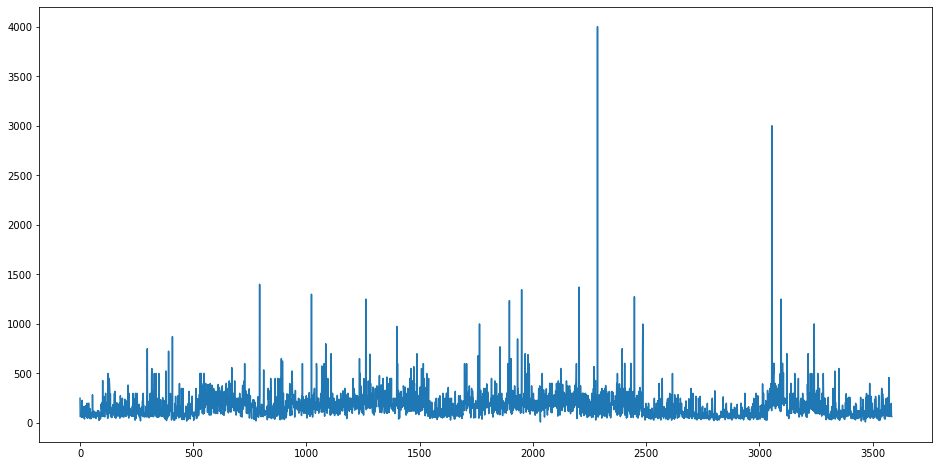

In [29]:
plt.figure(figsize=(16,8))
plt.plot(dataSelection['price'])
plt.show()

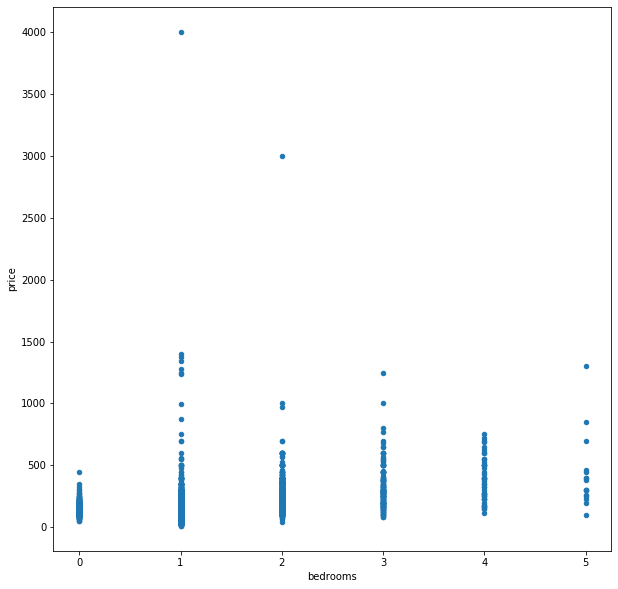

In [30]:
dataSelection.plot.scatter('bedrooms','price', figsize=(10,10))
plt.show()

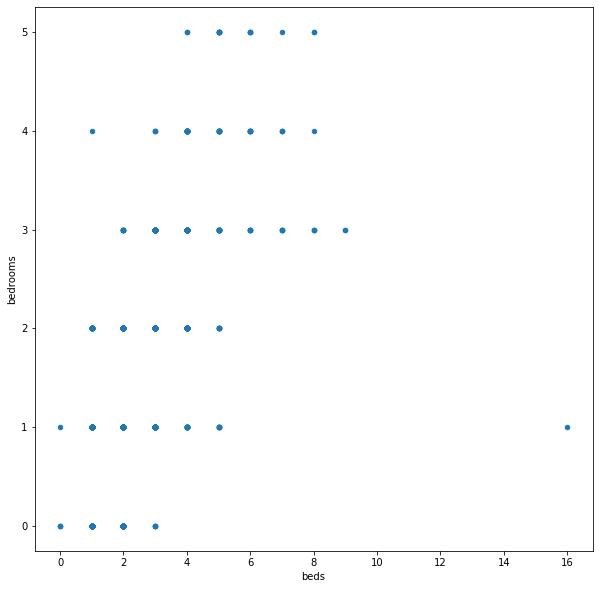

In [31]:
dataSelection.plot.scatter('beds','bedrooms', figsize=(10,10))
plt.show()

The graph shows that the number of beds will increase with the number of bedrooms.

## Now, Start to make stepwise regression

In [0]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [0]:
x = pd.DataFrame(dataSelection)
y = x.iloc[:, 0]
x = x.iloc[:, 1:12]

In [35]:
result = stepwise_selection(x, y)

print('resulting features:')
print(result)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  accommodates                   with p-value 4.07165e-166
Add  room_type                      with p-value 2.79328e-51
Add  bedrooms                       with p-value 2.25844e-22
Add  bathrooms                      with p-value 2.57158e-12
Add  property_type                  with p-value 0.000134347
Add  host_identity_verified         with p-value 0.00125877
resulting features:
['accommodates', 'room_type', 'bedrooms', 'bathrooms', 'property_type', 'host_identity_verified']


In [38]:
import statsmodels.api as sm

x = pd.DataFrame(dataSelection)
y = x.iloc[:, 0]
x = x.iloc[:, 5:11]

x = sm.add_constant(x)
est = sm.OLS(y,x).fit()
est.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     226.1
Date:                Tue, 03 Mar 2020   Prob (F-statistic):          4.08e-245
Time:                        03:27:13   Log-Likelihood:                -22245.
No. Observations:                3554   AIC:                         4.450e+04
Df Residuals:                    3547   BIC:                         4.455e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    104.6274      7.679     13.625      0.000      89.571     119.684
host_identity_verified   -15.4611      4.790     -3.228      0.001     -24.852      -6.070
property_type             -2.6295      0.685     -3.838      0.000      -3.973      -1.286
room_type                -79.2308      4.897    -16.178      0.000     -88.833     -69.629
accommodates              10.3631      1.997      5.190      0.000       6.448      14.278
bathrooms                 37.9868      4.833      7.860      0.000      28.512      47.462
bedrooms                  33.0472      4.308      7.671      0.000      24.601      41.494
==============================================================================
Omnibus:                     6342.216   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13241887.296
Skew:                          12.434   Prob(JB):                         0.00
Kurtosis:                     300.999   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

so that the Model is:

price = 104.6274 - 15.4611 * host_identity_verified - 2.6295 * property_type - 79.2308 * room_type + 10.3631 * accommodates + 37.9868 * bathrooms + 33.0472 * bedrooms